In [1]:
import pandas as pd
import seaborn as sns

In [2]:
simulation_data_file = "../gym_ACAS2D/models/logs/testing_ACAS2D_PPO_1048576_2_100.csv"

In [3]:
simulation = pd.read_csv(simulation_data_file)

In [4]:
simulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Episode                 100 non-null    int64  
 1   Outcome                 100 non-null    object 
 2   Total Reward            100 non-null    float64
 3   Time Steps              100 non-null    int64  
 4   Path Length             100 non-null    float64
 5   Closest Approach        100 non-null    float64
 6   Final Distance to Goal  100 non-null    float64
 7   Path                    100 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 6.4+ KB


In [5]:
simulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Episode                 100 non-null    int64  
 1   Outcome                 100 non-null    object 
 2   Total Reward            100 non-null    float64
 3   Time Steps              100 non-null    int64  
 4   Path Length             100 non-null    float64
 5   Closest Approach        100 non-null    float64
 6   Final Distance to Goal  100 non-null    float64
 7   Path                    100 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 6.4+ KB


In [6]:
simulation.head()

,Episode,Outcome,Total Reward,Time Steps,Path Length,Closest Approach,Final Distance to Goal,Path
0,1,Goal,1279.537607,681,816.0,182.569324,95.397469,"[(48, 400.0), (49.199595149350664, 400.0311685..."
1,2,Timeout,54.616387,1200,1438.8,101.647949,97.422226,"[(48, 400.0), (49.19967860132073, 399.97222854..."
2,3,Timeout,114.988605,1200,1438.8,161.872607,355.677264,"[(48, 400.0), (49.19907705813275, 400.04705537..."
3,4,Goal,1392.611762,637,763.2,189.024609,95.443841,"[(48, 400.0), (49.19832649545541, 400.06335306..."
4,5,Goal,1208.353375,947,1135.2,174.919902,95.930995,"[(48, 400.0), (49.19958973391052, 399.96862373..."


In [7]:
simulation.describe()

,Episode,Total Reward,Time Steps,Path Length,Closest Approach,Final Distance to Goal
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,50.500000,905.293685,992.48000,1189.776000,160.174733,163.646927
std,29.011492,485.089564,201.23023,241.476277,24.461751,141.020802
min,1.000000,49.690832,636.00000,762.000000,98.306757,94.873866
25%,25.750000,195.904408,934.25000,1119.900000,147.800845,95.406243
50%,50.500000,1158.570074,1014.00000,1215.600000,170.446110,95.723199
75%,75.250000,1233.582343,1200.00000,1438.800000,176.594282,293.355953
max,100.000000,1414.130271,1200.00000,1438.800000,191.587321,1146.326789


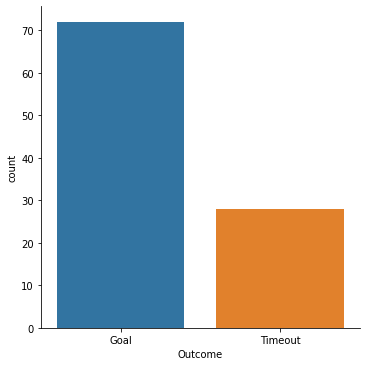

In [8]:
sns.catplot(x="Outcome", data=simulation, kind="count")

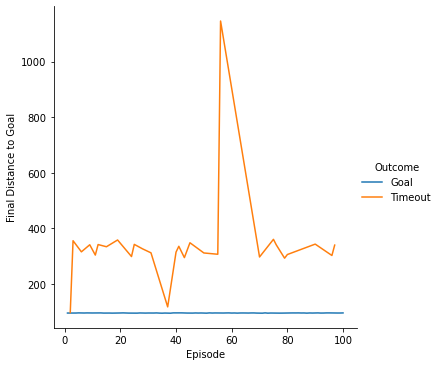

In [9]:
sns.relplot(x="Episode", y="Final Distance to Goal", data=simulation, 
            kind ="line", 
            hue="Outcome")

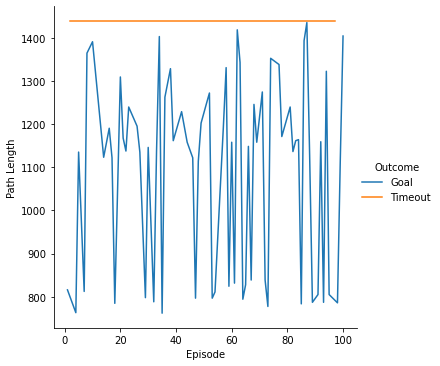

In [10]:
sns.relplot(x="Episode", y="Path Length", data=simulation, 
            kind ="line", 
            hue="Outcome")

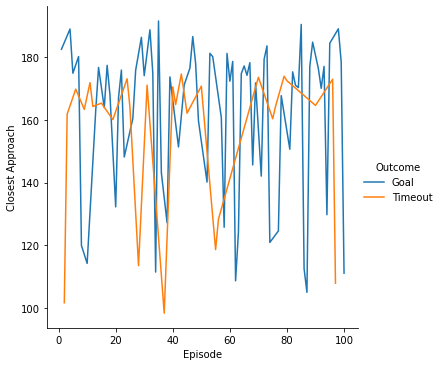

In [11]:
sns.relplot(x="Episode", y="Closest Approach", data=simulation, 
            kind ="line", 
            hue="Outcome")

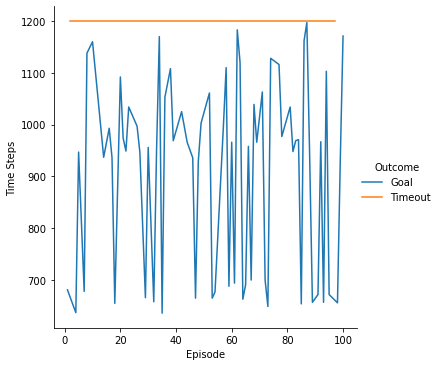

In [12]:
sns.relplot(x="Episode", y="Time Steps", data=simulation, 
            kind ="line", 
            hue="Outcome")

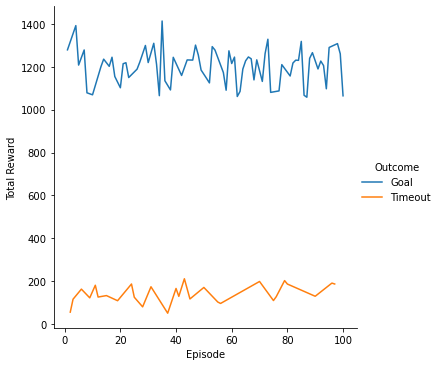

In [13]:
sns.relplot(x="Episode", y="Total Reward", data=simulation, 
            kind ="line", 
            hue="Outcome")

In [14]:
# Create paths dataframe

import ast

paths_df = pd.DataFrame()

e_values, o_values, x_values, y_values = [], [], [], []
for index, row in simulation.iterrows():
    for (x, y) in ast.literal_eval(row["Path"]):
        e_values.append(row["Episode"])
        o_values.append(row["Outcome"])
        x_values.append(x)
        y_values.append(-y)

paths_df["Episode"] = e_values
paths_df["Outcome"] = o_values
paths_df["x"] = x_values
paths_df["y"] = y_values

In [15]:
paths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99248 entries, 0 to 99247
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Episode  99248 non-null  int64  
 1   Outcome  99248 non-null  object 
 2   x        99248 non-null  float64
 3   y        99248 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.0+ MB


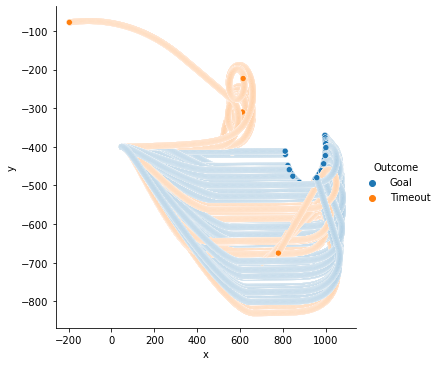

In [16]:
sns.relplot(x="x", y="y", hue="Outcome", kind="scatter", data=paths_df)

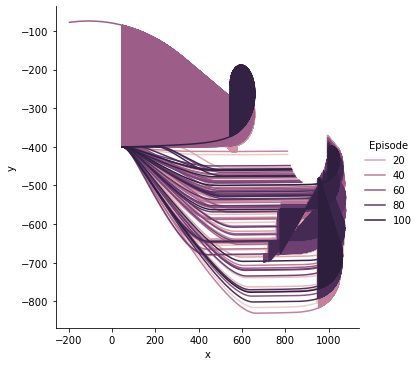

In [17]:
sns.relplot(x="x", y="y", hue="Episode", kind="line", data=paths_df)